#Linear Support Vector Machines Classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification, make_blobs
# set default colour map for entire notebook/session
sns.set_theme(style="whitegrid")

## Model

- SVM finds the separating hyperplanes between the classes-but with constraint that the margin between two classes is maximized
- The hard margin SVM assumes that the classes are linearly separable and none of the data point is with in the margin or is misclassified

`y=np.sign(np.dot(w,x)+b)`

## Loss function

We use hinge loss : `max(0,1-t)`
- It is equal to 0 when t>=1
-Its derivative is equal to -1 if t<1 and 0 if t>1
- It is not differentiable at t=1

Hinge Loss function of SVM:
$$J(w,b)=\frac{1}{2}||\mathbf{w}||^2+C\sum_{i=1}^nmax(1-y^{(i)}(\mathbf{w^Tx^{(i)}+b}),0)$$


## Soft SVM Implementation

In [2]:
class softSVM:
  def __init__(self,C):
    self._support_vectors = None
    self.C=C
    self.w=None
    self.b=None
    self.X=None
    self.y=None

    #n is the number of data points
    self.n=0

    # d is the numner of dimensions
    self.d=0

  def __decision_function(self,X):
    return X.dot(self.w)+ self.b

  def __cost(self,margin):
    return (1/2)*self.w.dot(self.w)+self.C*np.sum(
        np.maximum(0,1-margin))
  def __margin(self,X,y):
    return y*self.__decision_function(X)
  def fit(self,X,y,lr=1e-3, epochs=500):
    #Initialize w and b
    self.n,self.d= X.shape
    self.w = np.random.randn(self.d)
    self.b=0

    #Required only for plotting
    self.X=X
    self.y=y

    loss_array=[]
    for _ in range(epochs):
      margin = self.__margin(X,y)
      loss = self.__cost(margin)
      loss_array.append(loss)

      missclassified_pts_idx = np.where(margin<1)[0]
      d_w = self.w-self.C*y[missclassified_pts_idx].dot(X[missclassified_pts_idx])
      self.w = self.w-lr*d_w

      d_b = -self.C*np.sum(y[missclassified_pts_idx])
      self.b = self.b-lr*d_b

    self._support_vectors= np.where(self.__margin(X,y)<=1)[0]
  
  def predict(self,X):
    return np.sign(self.__decision_function(X))
  
  def score(self,X,y):
    p=self.predict(X)
    return np.mean(y==p)

  def plot_decision_boundary(self):
    plt.scatter(self.X[:,0],self.X[:,1],c=self.y,marker='o',
                s=100, cmap='autumn')
    ax=plt.gca()
    xlim=ax.get_xlim()
    ylim = ax.get_ylim()

    #create grid to evaluate model
    xx= np.linspace(xlim[0],xlim[1],30)
    yy= np.linspace(ylim[0],ylim[1],30)
    YY, XX = np.meshgrid(yy,xx)
    xy = np.vstack([XX.ravel(),YY.ravel()]).T
    Z=self.__decision_function(xy).reshape(XX.shape)

    #plot decision boundary and margins
    ax.contour(XX,YY,Z, colors=['g','k','g'],levels=[-1,0,1],
               linestyles=['--','-','--'], linewidth=[2.0,2.0,2.0])
    
    #highlight the support vector
    ax.scatter(self.X[:,0][self._support_vectors],
               self.X[:,1][self._support_vectors],s=250,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()



### Demo-1: Linearly Separable data

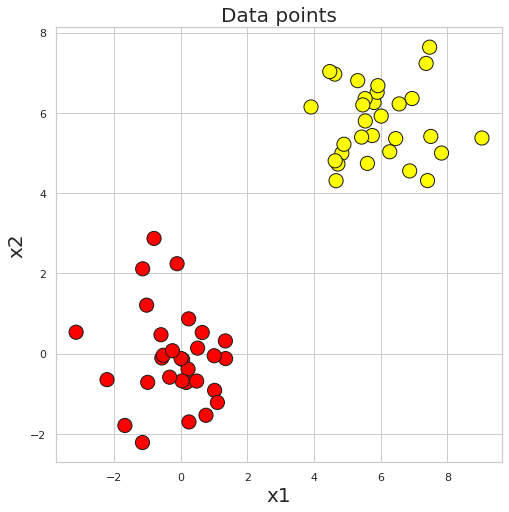

In [ ]:
X,Y = make_blobs(n_samples=60,
                 n_features=2,
                 centers=[[0,0],[6,6]],
                 cluster_std=1,
                 random_state=12)
Y=np.where(Y==0,-1,1)

#plot the two classes
plt.figure(figsize=(8,8))

plt.scatter(X[:,0],X[:,1],marker='o',c=Y, s=200, edgecolor='k', cmap='autumn')
plt.xlabel('x1',fontsize=20)
plt.ylabel('x2',fontsize=20)
plt.title('Data points', fontsize=20)
plt.show()

[0.38471898 0.18969597]


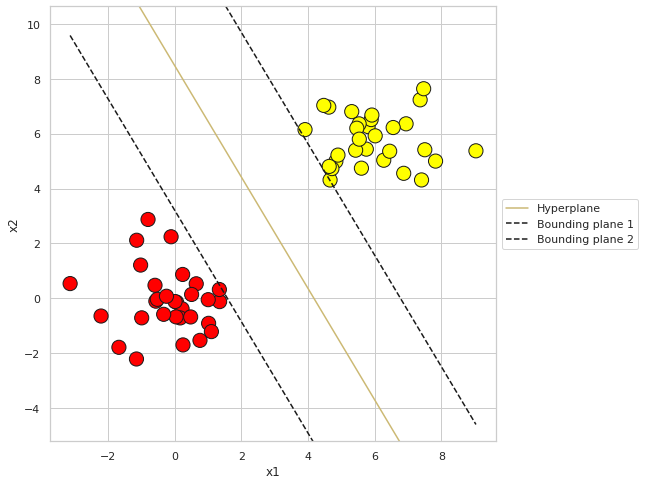

In [ ]:
svm=softSVM(C=1)
svm.fit(X,Y)
print(svm.w)

def get_hyperplane_value(x,w,b,offset):

  return -1*(w[0]*x+b+offset)/w[1]
  #  return (-w[0]*x+b+offset)/w[1]

fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
plt.scatter(X[:,0],X[:,1],marker='o',c=Y, s=200, edgecolor='k', cmap='autumn')
x0_1 =np.amin(X[:,0])
x0_2=np.amax(X[:,0])

x1_1=get_hyperplane_value(x0_1,svm.w,svm.b,0)
x1_2=get_hyperplane_value(x0_2,svm.w,svm.b,0)

x1_1_m=get_hyperplane_value(x0_1,svm.w,svm.b,-1)
x1_2_m=get_hyperplane_value(x0_2,svm.w,svm.b,-1)

x1_1_p=get_hyperplane_value(x0_1,svm.w,svm.b,1)
x1_2_p=get_hyperplane_value(x0_2,svm.w,svm.b,1)

ax.plot([x0_1,x0_2],[x1_1,x1_2],"y")
ax.plot([x0_1,x0_2],[x1_1_m,x1_2_m],"k--")
ax.plot([x0_1,x0_2],[x1_1_p,x1_2_p],"k--")

x1_min =np.amin(X[:,1])
x1_max=np.amax(X[:,1])
ax.set_ylim([x1_min-3,x1_max+3])
ax.legend(['Hyperplane','Bounding plane 1', 'Bounding plane 2'],loc='center left',bbox_to_anchor=(1,0.5))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Prediction for new example

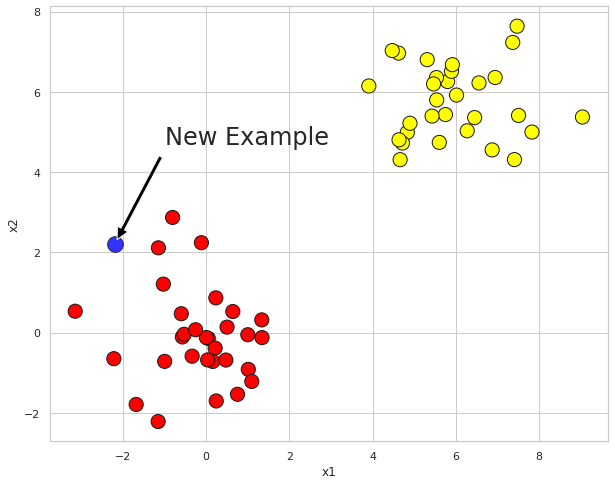

In [ ]:
newExample=np.array([-2.2,2.2])
plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(X[:,0],X[:,1],marker='o',edgecolor='k',
            c=Y,s=200,cmap='autumn')
plt.scatter(newExample[0],newExample[1],marker='o',edgecolor='k',
            c='blue',s=250,alpha=0.8)
plt.annotate('New Example', xy=newExample,
             xytext=(50,100),textcoords = 'offset points',
             arrowprops=dict(facecolor='black',shrink=0.05),fontsize=24)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
svm.predict(newExample)

-1.0

## Demo-2: Linearly separable with noise

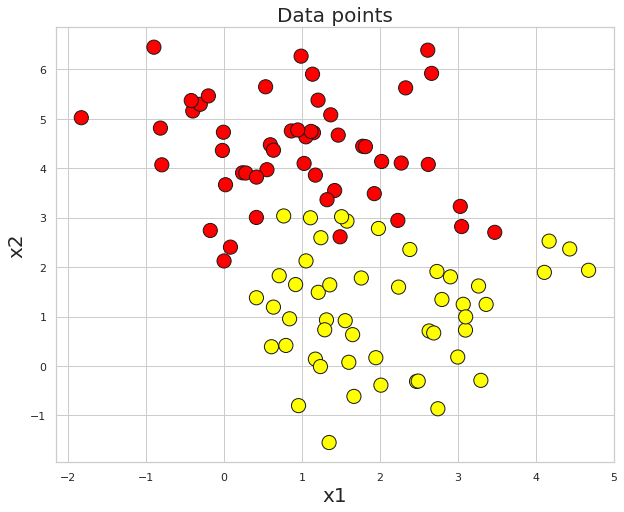

In [ ]:
X,y = make_blobs(n_samples=100,
                 n_features=2,
                 centers=2,
                 cluster_std=1.1,
                 random_state=0)


#plot the two classes
plt.figure(figsize=(10,8))

plt.scatter(X[:,0],X[:,1],marker='o',c=Y, s=200, edgecolor='k', cmap='autumn')
plt.xlabel('x1',fontsize=20)
plt.ylabel('x2',fontsize=20)
plt.title('Data points', fontsize=20)
plt.show()

[ 0.30499981 -1.62569109] 3.7100000000000053


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: UserWarning: The following kwargs were not used by contour: 'linewidth'


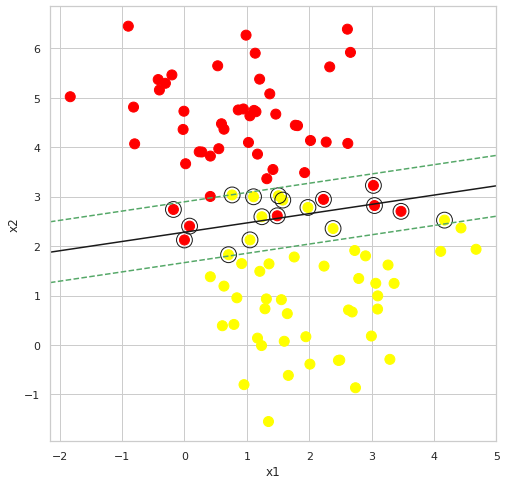

In [ ]:
y[y==0]=-1
svm = softSVM(C=10)
svm.fit(X,y)
print(svm.w,svm.b)
fig =plt.figure(figsize=(8,8))
svm.plot_decision_boundary()

## Demo-3: Non-Linearly separable data

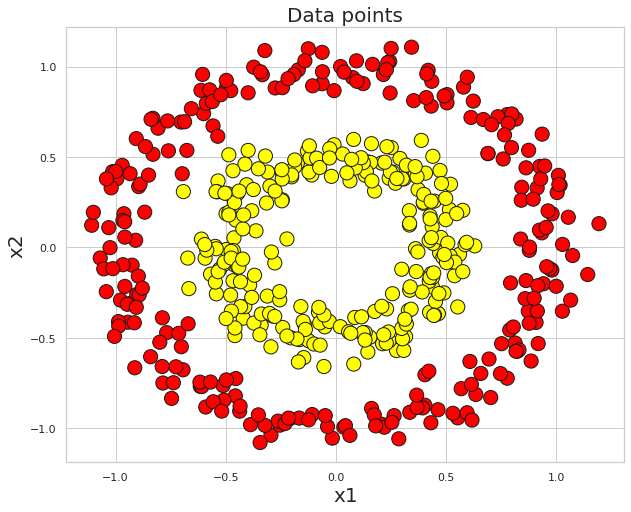

In [ ]:
from sklearn.datasets import make_circles
X,y =make_circles(500,factor=.5,noise=.08)
y[y==0]=-1

plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1], marker='o',c=y,s=200,edgecolor='k',cmap='autumn')
plt.xlabel('x1',fontsize=20)
plt.ylabel('x2',fontsize=20)
plt.title('Data points', fontsize=20)
plt.show()

[-55.58718916  25.06212619] 68.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: UserWarning: The following kwargs were not used by contour: 'linewidth'


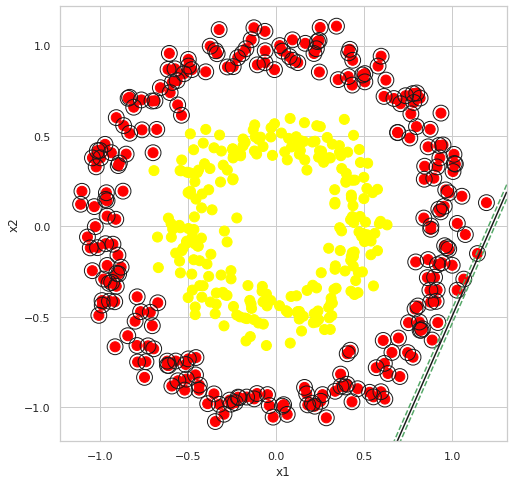

In [ ]:
y[y==0]=-1
svm = softSVM(C=1000)
svm.fit(X,y)
print(svm.w,svm.b)
fig =plt.figure(figsize=(8,8))
svm.plot_decision_boundary()

# Kernel SVM

We will be implementing dual problem of soft SVM by replacing the dot product between two features with the kernel function

In [3]:
class SVMDualProblem:
  def __init__(self,C=1.0,kernel='rbf',sigma=0.1, degree=2):
    self.C=C
    if kernel=='poly':
      self.kernel = self._polynomial_kernel
      self.c=1
      self.degree=degree
    else:
      self.kernel = self._rbf_kernel
      self.sigma = sigma

    self.X=None
    self.y=None
    self.alpha=None
    self.b=0
    self.ones=None

  def _rbf_kernel(self,X1,X2):
    return np.exp(-(1/self.sigma**2)*np.linalg.norm(
        X1[:,np.newaxis]-X2[np.newaxis,:],axis=2)**2)
  
  def _polynomial_kernel(self,X1,X2):
    return (self.c+X1.dot(X2.T))**self.degree

  def fit(self,X,y,lr=1e-3,epochs=100):
    self.X=X
    self.y=y

    self.alpha=np.random.random(X.shape[0])
    self.b=0
    self.ones = np.ones(X.shape[0])

    y_iy_jk_ij=np.outer(y,y)*self.kernel(X,X)
    losses=[]
    for _ in range(epochs):
      gradient = self.ones -y_iy_jk_ij.dot(self.alpha)
      #gradient = self.ones-np.sum(y_iy_jk_ij*self.alpha)

      self.alpha=self.alpha+lr*gradient

      self.alpha[self.alpha>self.C]=self.C
      self.alpha[self.alpha<0]=0

      loss = np.sum(self.alpha)-0.5*np.sum(np.outer(self.alpha,self.alpha)*y_iy_jk_ij)
      losses.append(loss)

    index = np.where((self.alpha)>0 & (self.alpha<self.C))[0]
    b_i =y[index]-(self.alpha*y).dot(self.kernel(X,X[index]))

    self.b=np.mean(b_i)

    plt.plot(losses)
    plt.title('loss per epoch')
    plt.show()
  
  def _decision_function(self,X):
    return (self.alpha*self.y).dot(self.kernel(self.X,X))+self.b

  def predict(self,X):
    return np.sign(self._decision_function(X))

  def score(self,X,y):
    y_hat= self.predict(X)
    return np.mean(y==y_hat)

  def plot_decision_boundary(self):
    plt.scatter(self.X[:,0],self.X[:,1],c=self.y,alpha=0.5,
                s=50, cmap=plt.cm.Paired)
    ax=plt.gca()
    xlim=ax.get_xlim()
    ylim = ax.get_ylim()

    #create grid to evaluate model
    xx= np.linspace(xlim[0],xlim[1],30)
    yy= np.linspace(ylim[0],ylim[1],30)
    YY, XX = np.meshgrid(yy,xx)
    xy = np.vstack([XX.ravel(),YY.ravel()]).T
    Z=self._decision_function(xy).reshape(XX.shape)

    #plot decision boundary and margins
    ax.contour(XX,YY,Z, colors=['g','k','g'],levels=[-1,0,1],
               linestyles=['--','-','--'], linewidth=[2.0,2.0,2.0])
    
    #highlight the support vector
    ax.scatter(self.X[:,0][self.alpha>0],
               self.X[:,1][self.alpha>0],s=50,
               linewidth=1, facecolors='none', edgecolors='k')
    
    plt.show()



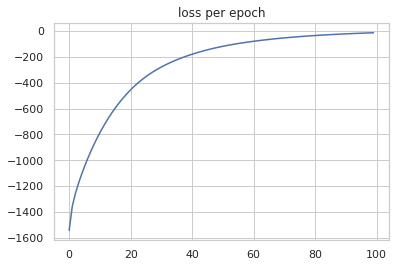

train score: 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: UserWarning: The following kwargs were not used by contour: 'linewidth'


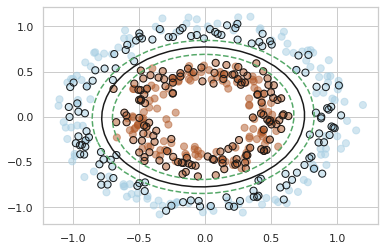

In [ ]:
svm=SVMDualProblem(C=1.0,kernel='poly',degree=2)
svm.fit(X,y,lr=1e-3)
print("train score:",svm.score(X,y))
svm.plot_decision_boundary()

#Practice Assignment

In [8]:
X=np.array([[3,1],[3,-1],[6,1],[6,-1],[1,0],[0,1],[0,-1],[-1,0]])
y=np.array([1,1,1,1,-1,-1,-1,-1])
svm=softSVM(0)



In [9]:
svm.fit(X,y)

In [10]:
svm.w

array([-1.05732305,  0.48762103])

In [11]:
svm.b

0.0